<a href="https://colab.research.google.com/github/sardaaryan/Story/blob/main/simple_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#Creat a Model Class that inherits nn.Module
class Model(nn.Module):
  #Input layer --> Hidden Layer 1(number of neurons) --> H2(n) =-> output

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #Instantiates our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [ ]:
#Pick a manual seed for randomization
torch.manual_seed(41)
#Create an instance of Model class
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [ ]:
#Replace variety column values from string to numeric
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
#Train Test Split
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [ ]:
#Convert to numpy arrays
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [46]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [47]:
#Convert X features to FloatTensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [48]:
#Convert y features to LongTensor
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [49]:
#Set criterion of model to measure error(Loss functions)'
criterion = nn.CrossEntropyLoss()
#Choose Adam Optimizer, lr = learning rate(repeat optimization of weights until loss function decreases by less than lr)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [50]:
#Train our model!
#Epochs? (one run through all the trainig data in our network)
epochs = 100
loses = []
for i in range(epochs):
  y_pred = model.forward(X_train)

  loss = criterion(y_pred, y_train)

  loses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 0.008716609328985214
Epoch: 10 and loss: 0.02150115929543972
Epoch: 20 and loss: 0.015044966712594032
Epoch: 30 and loss: 0.010357171297073364
Epoch: 40 and loss: 0.008780923672020435
Epoch: 50 and loss: 0.008344319649040699
Epoch: 60 and loss: 0.008119459263980389
Epoch: 70 and loss: 0.007923982106149197
Epoch: 80 and loss: 0.007781927473843098
Epoch: 90 and loss: 0.0076745543628931046


Text(0.5, 0, 'Epoch')

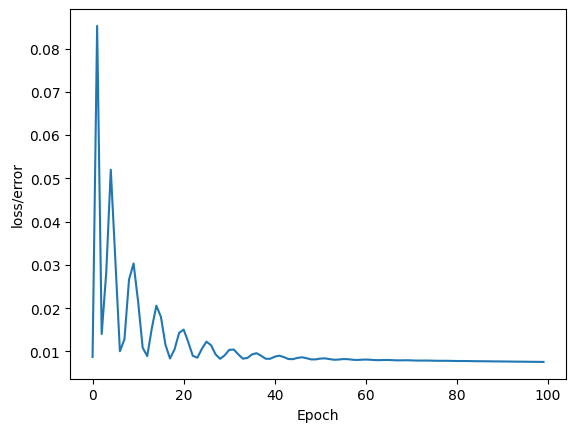

In [51]:
#graph it
plt.plot(range(epochs), loses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [52]:
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [53]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-25.8388,   0.7555,   9.8228]) 	 2 	 2
2.)  tensor([-35.7125,  -1.9051,  17.0177]) 	 2 	 2
3.)  tensor([-39.6981,  -1.8970,  18.7235]) 	 2 	 2
4.)  tensor([-11.8803,   9.5914,  -8.2914]) 	 1 	 1
5.)  tensor([-32.8298,  -0.7637,  14.6484]) 	 2 	 2
6.)  tensor([ -5.5096,  13.0600, -16.2669]) 	 1 	 1
7.)  tensor([-24.9478,   2.2673,   7.3173]) 	 2 	 2
8.)  tensor([-11.2711,   9.9939,  -9.1073]) 	 1 	 1
9.)  tensor([-28.8874,   0.4582,  11.4691]) 	 2 	 2
10.)  tensor([-38.0036,  -2.1401,  18.2431]) 	 2 	 2
11.)  tensor([-22.9192,   3.1370,   5.2791]) 	 2 	 2
12.)  tensor([ 31.5926,  11.8840, -55.4698]) 	 0 	 0
13.)  tensor([ 28.5749,  10.8302, -50.3407]) 	 0 	 0
14.)  tensor([ -2.3632,  12.8112, -17.6374]) 	 1 	 1
15.)  tensor([ 26.3489,  11.9891, -48.7559]) 	 0 	 0
16.)  tensor([-20.6892,   4.6203,   2.2942]) 	 2 	 1
17.)  tensor([ 28.7267,  11.1932, -50.9261]) 	 0 	 0
18.)  tensor([-24.4360,   1.7657,   7.8390]) 	 1 	 2
19.)  tensor([ 33.2419,  11.8694, -57.6492]) 	 0 	 0
20

In [54]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [55]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 30.4545,  11.3740, -53.4165])


In [56]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [57]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 30.4545,  11.3740, -53.4165])


In [58]:
torch.save(model.state_dict(), 'my_really_awsome_iris_model.pt')

In [60]:
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awsome_iris_model.pt'))

<All keys matched successfully>

In [61]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)